In [13]:
source("./preprocess/utils.R")

parser <- ArgumentParser()

parser$add_argument("--task", type = "character", default = "new_query_cl")
parser$add_argument("--method", type = "character", default = "midas_embed")
parser$add_argument("--exp", type = "character", default = "c_3")
parser$add_argument("--model", type = "character", default = "default")
parser$add_argument("--init_model", type = "character", default = "")
o <- parser$parse_known_args()[[1]]

In [14]:
# load labels
result_dir <- pj("result", "comparison", o$task, o$method, o$exp, o$model, o$init_model)
pred <- gsub(" cell.*", "", read.csv(pj(result_dir, "label_transferred.csv"), header = F)[, 1])
gt <- gsub(" cell.*", "", read.csv(pj(result_dir, "label_gt.csv"), header = F)[, 1])

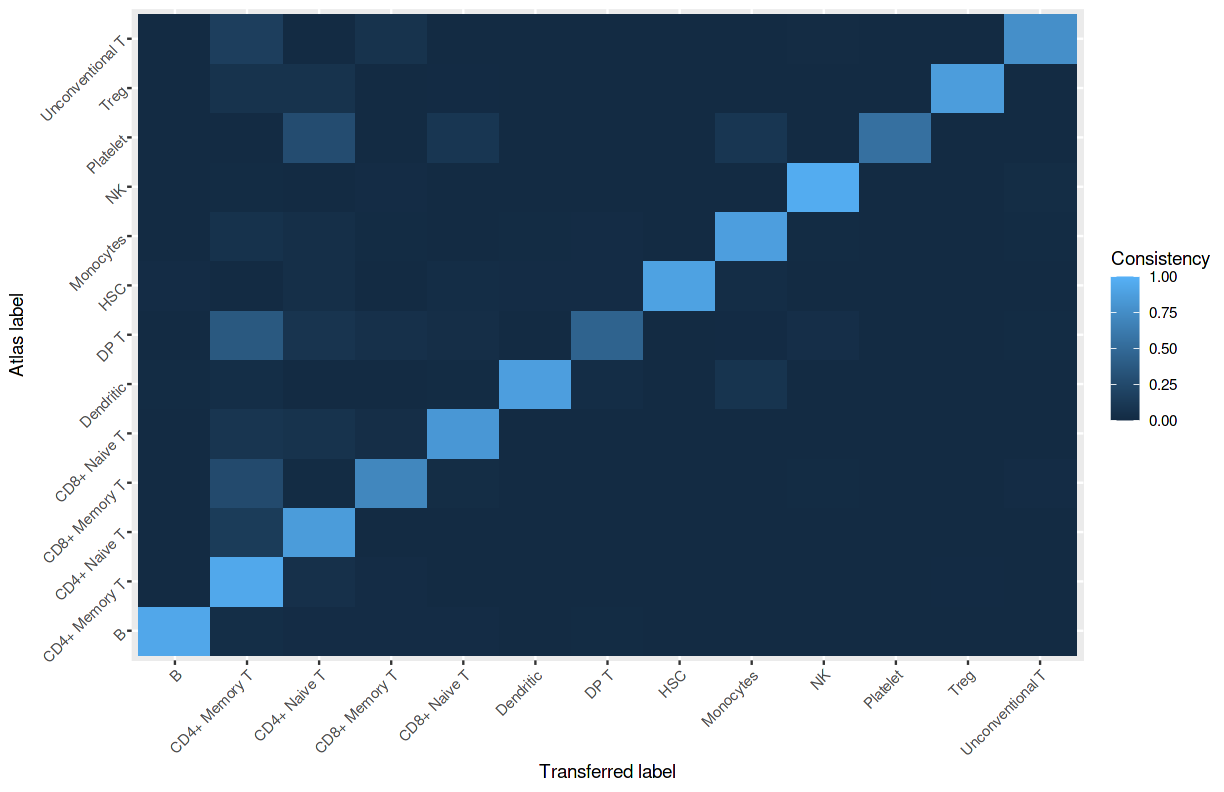

In [15]:
w <- 5.1
h <- 3.3
keep_class <- F
legend <- T
y_lab <- "Atlas label"
x_lab <- "Transferred label"
image_dir <- "./analysis/fig"
# title_name <- rename_task_lt(o$task, o$init_model)

p <- cm_plot(pred, gt, keep_class, legend)  + theme(plot.title = element_text(hjust = 0.5)) +
     ylab(y_lab) + xlab(x_lab)
plt_size(2*w, 2*h)
p   

In [12]:
mkdir(image_dir, remove_old = F)
ggsave(plot = p, file = pj(image_dir, paste0("confusion_", o$task, "_", o$exp, ".png")), width = 1.5*w, height = 1.5*h, limitsize = F)
ggsave(plot = p, file = pj(image_dir, paste0("confusion_", o$task, "_", o$exp, ".pdf")), width = 1.5*w, height = 1.5*h, limitsize = F)